In [98]:
import numpy as np
import pandas as pd
import scipy.linalg as linalg
import pdb
import matplotlib.pyplot as plt
import os

# The dataset we choose
## 我们选择的数据集是人类活动数据集合HAPT Data Set

In [99]:
root_path = r'/Users/francis/Desktop/DTU/classes/02450_intro/programme/HAPT Data Set/'
x_train_path = (os.path.join(root_path,"Train","X_train.txt")) # sample as row
y_train_path = os.path.join(root_path,"Train","y_train.txt") # each sample to avtivity label
x_test_path =  os.path.join(root_path,"Test","X_test.txt")
y_test_path = os.path.join(root_path,"Test","y_test.txt") 
feature_path = os.path.join(root_path,"features.txt") # -> attributes
activity_path = os.path.join(root_path,"activity_labels.txt") # -> Y-label

# Show attribute names
## 显示数据集的参数名称，每一行的数据的每个维度的现实意义

In [201]:
attributeNames = pd.read_csv(feature_path, header=None, sep='/n')
attri_map = np.reshape(attributeNames.values,(-1,len(attributeNames)))
attri_map = attri_map.T
attri_map.shape

/Users/francis/opt/anaconda3/envs/course_02450/lib/python3.8/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


(561, 1)

# Show the head sixth rows of our training data 
## 显示数据集的前六行

In [101]:
# train daatset
x_train = pd.read_csv(x_train_path, header=None, sep='\s+')
x_train.columns = attributeNames.values.squeeze().tolist()
y_train = pd.read_csv(y_train_path, header=None, sep='\s+')

# test dataset
x_test = pd.read_csv(x_test_path, header=None, sep='\s+')
x_test.columns = attributeNames.values.squeeze().tolist()
y_test = pd.read_csv(y_test_path, header=None, sep='\s+')

# map label
map_acti = pd.read_csv(activity_path, header=None, sep='\s+')


# acti_dict = { 1: 'WALKING', 2: 'WALKING_UPSTAIRS', 3: 'WALKING_DOWNSTAIRS', 
#               4: 'SITTING', 5: 'STANDING', 6: 'LAYING', 7: 'STAND_TO_SIT', 
#               8: 'SIT_TO_STAND', 9: 'SIT_TO_LIE', 10: 'LIE_TO_SIT', 11: 'STAND_TO_LIE', 12: 'LIE_TO_STAND'}
acti_dict = {}
for i in range(len(map_acti)):
    key = int(map_acti.values[i][0])
    value = str(map_acti.values[i][1])
    acti_dict[key] = value

x_train = x_train.values # 7767*561
y_train = y_train.values # 7767*1

# split according to the acti from x_train
# split_acti: { key:value }
# key: activity numer
# value: the data from x_train according activity numer
split_acti = {}
for key,value in acti_dict.items():
    idx = np.where(key == y_train[:,0])
    split_acti[key] = x_train[idx[0]]



111


**Draw the outlier from 3 attributies**

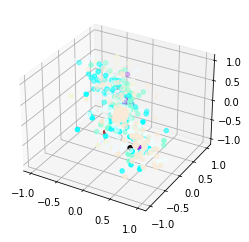

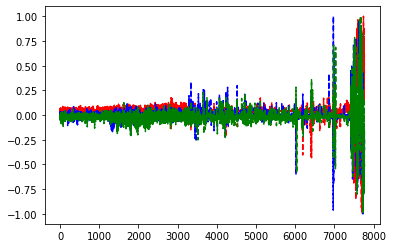

In [102]:
# draw_attirs
# draw_attirs[0] = the 1 attributes from all activities
# draw_attirs[1] = the 2 attributes from all activities
# draw_attirs[2] = the 3 attributes from all activities
attri_nums = 3
draw_attirs = np.empty(shape=[0, attri_nums])


test_all = 0
for key,value in split_acti.items():
    draw_attirs = np.concatenate((draw_attirs,split_acti[key][:,:attri_nums]),axis=0)

draw_attirs = np.concatenate((draw_attirs,y_train),axis=1)


# origin of the data
plt.figure()
color  = ['#F0F8FF','#FAEBD7','#00FFFF','#7FFFD4','#F0FFFF','#F5F5DC','#FFE4C4','#000000','#FFEBCD','#0000FF','#8A2BE2','#A52A2A',]
Grap0 = plt.axes(projection='3d')
for key,value in acti_dict.items():
    idx = np.where(key == y_train[:,0])
    temp_loc = draw_attirs[idx[0]]
    old_cor_X, old_cor_Y, old_cor_Z = temp_loc[:,0], temp_loc[:,1], temp_loc[:,2]
    Grap0.scatter(old_cor_X, old_cor_Y, old_cor_Z, c=color[key-1])
plt.show()


# # # Plot PCA of the data
# plt.figure()
# Grap1 = plt.axes(projection='3d')
# new_cor_X, new_cor_Y, new_cor_Z = Z[:,0], Z[:,1], Z[:,2]
# Grap1.scatter(new_cor_X, new_cor_Y, new_cor_Z, c='r')
# plt.show()

# show whether belong to normal distribution
plt.figure()
plt.plot(draw_attirs[:,0],'r--')
plt.plot(draw_attirs[:,1],'b--')
plt.plot(draw_attirs[:,2],'g--')



U.shape (7767, 561)
S.shape (561,)
V.shape (561, 561)
Z.shape (7767, 561)


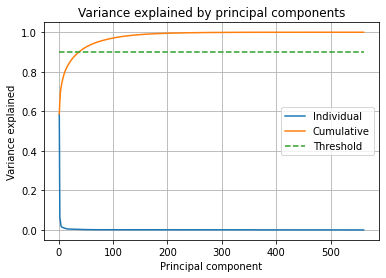

In [175]:
attri_mean = x_train.mean(axis=0)


x_train_mean = np.array([ x_train[:,i]-attri_mean[i] for i in range(len(attri_mean[:,]))])
x_train_mean = x_train_mean.T

U,S,VT = linalg.svd(x_train_mean,full_matrices=False)
V = VT.T
rho = (S*S) / (S*S).sum()
Z = x_train_mean @ V

# detransfrom img = Z[:,rank(i)] @ V[:,rank(i)] 
print("U.shape",U.shape)
print("S.shape",S.shape)
print("V.shape",V.shape)
print("Z.shape",Z.shape)

## Plot variance explained
threshold = 0.9
plt.figure()
plt.plot(range(1,len(rho)+1),rho,'-')                  # 绘制各在成分上投影的方差
plt.plot(range(1,len(rho)+1),np.cumsum(rho),'-')       # 绘制各成分累加的可解释变异或课解释方差
plt.plot([1,len(rho)],[threshold, threshold],'--')     # 绘制压缩要求阈值
plt.title('Variance explained by principal components')
plt.xlabel('Principal component')
plt.ylabel('Variance explained')
plt.legend(['Individual','Cumulative','Threshold'])
plt.grid()
plt.show()

# a = np.sort(x_train[:,0])
# print(a)
# print(a[:3])
# print(a[-3:])

/var/folders/85/6nz_384x33x3g_tv6hv463th0000gn/T/ipykernel_28309/4228955433.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(18,6))


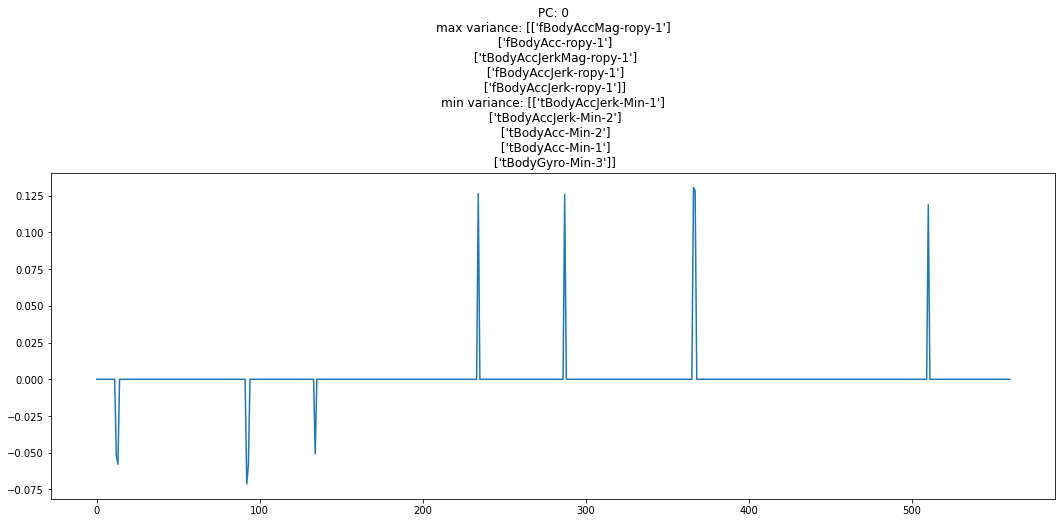

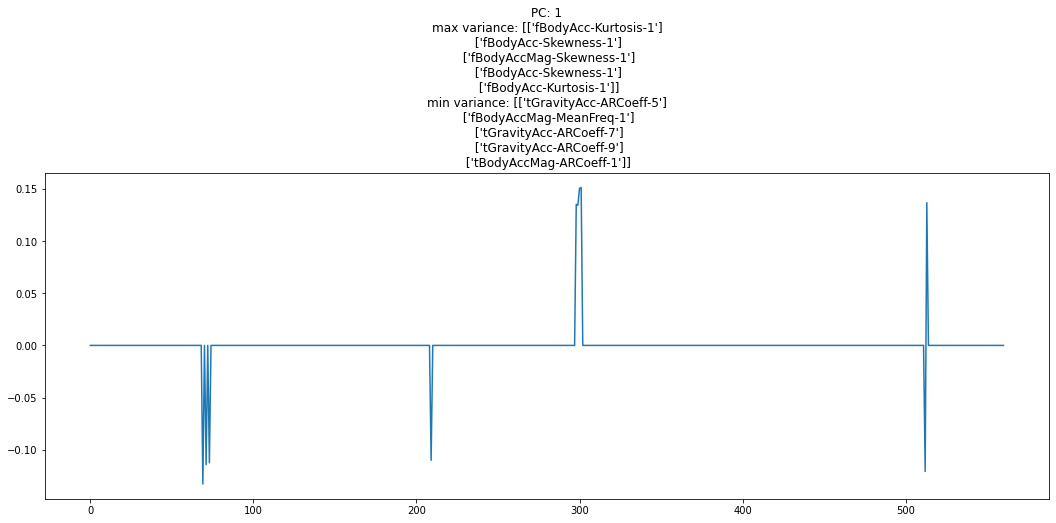

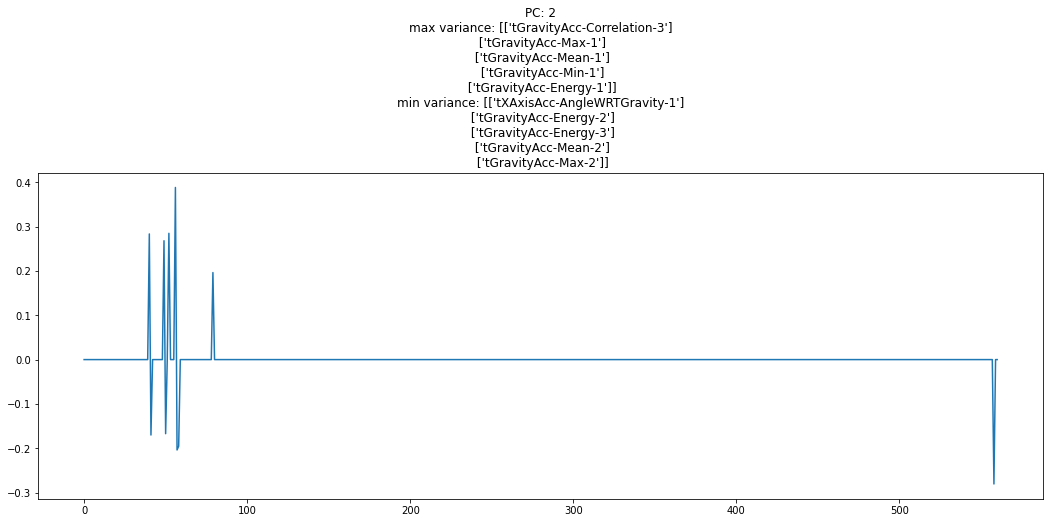

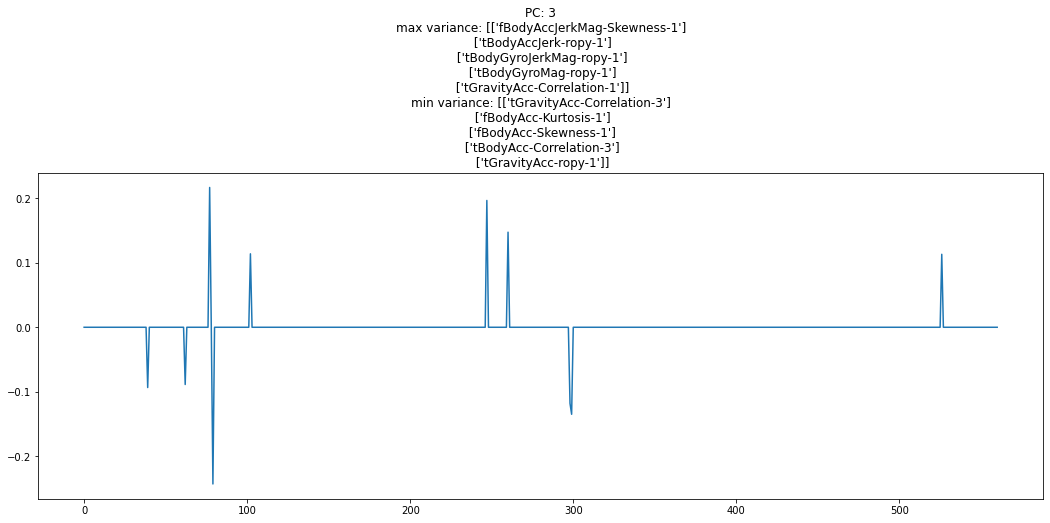

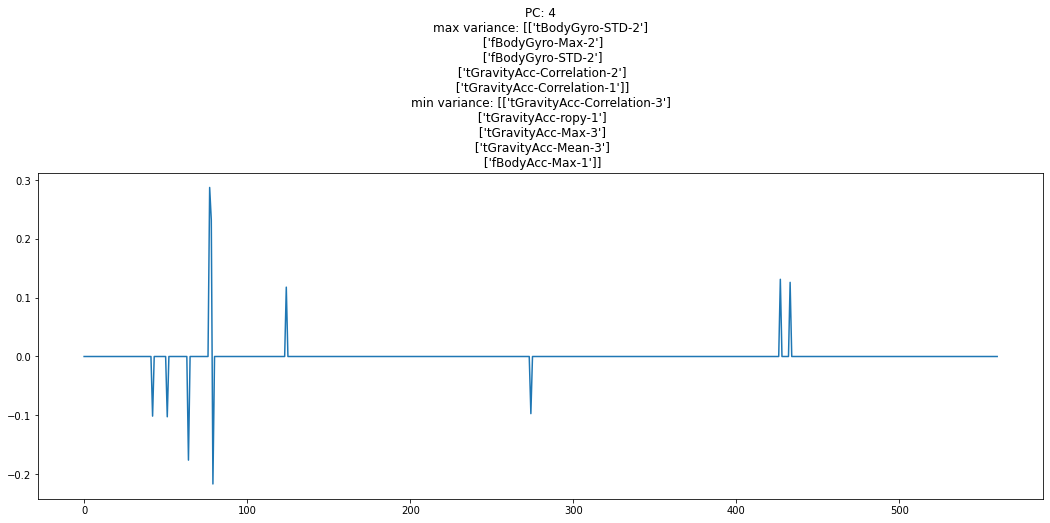

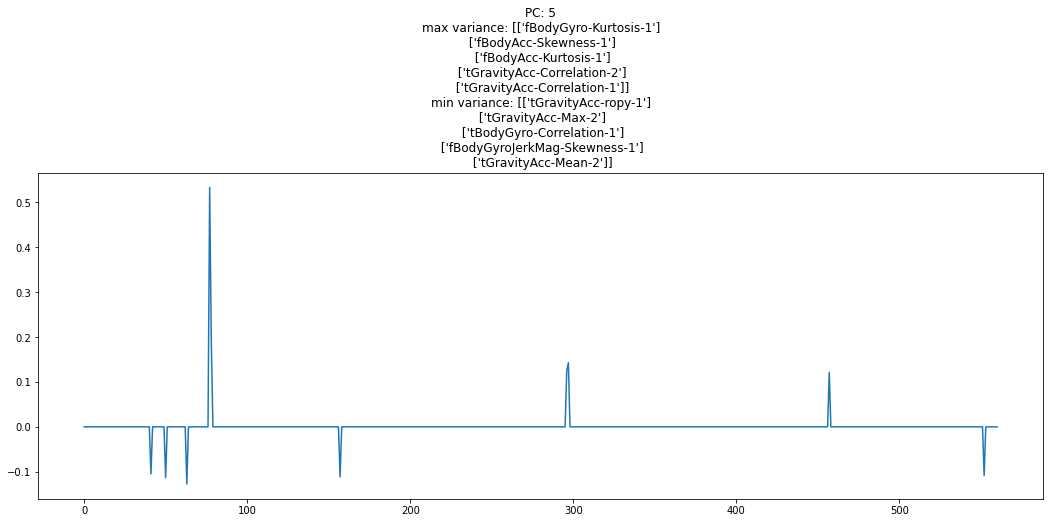

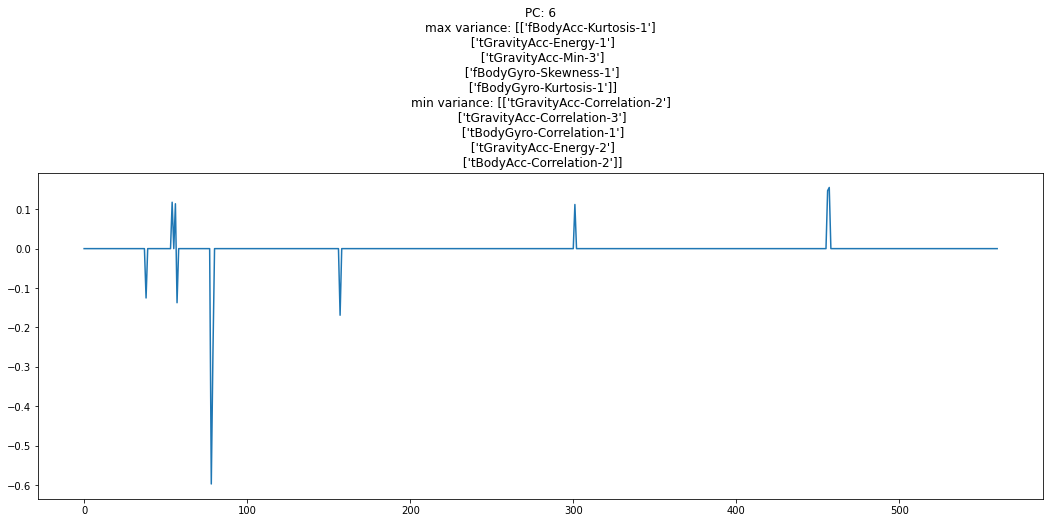

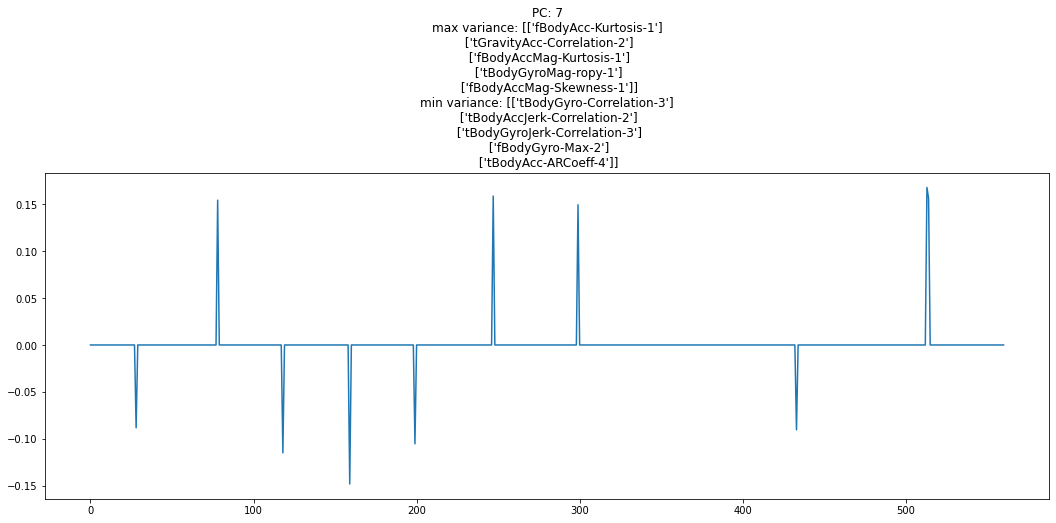

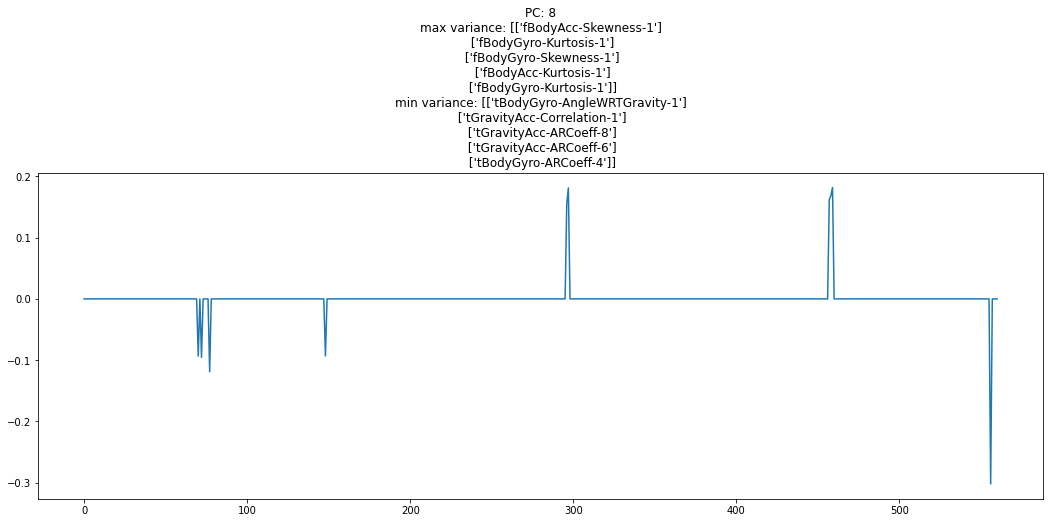

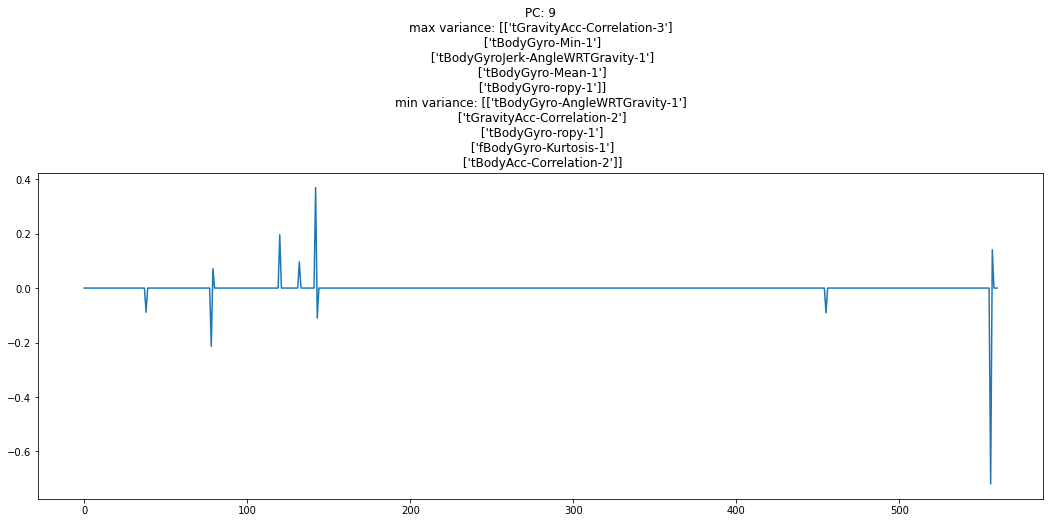

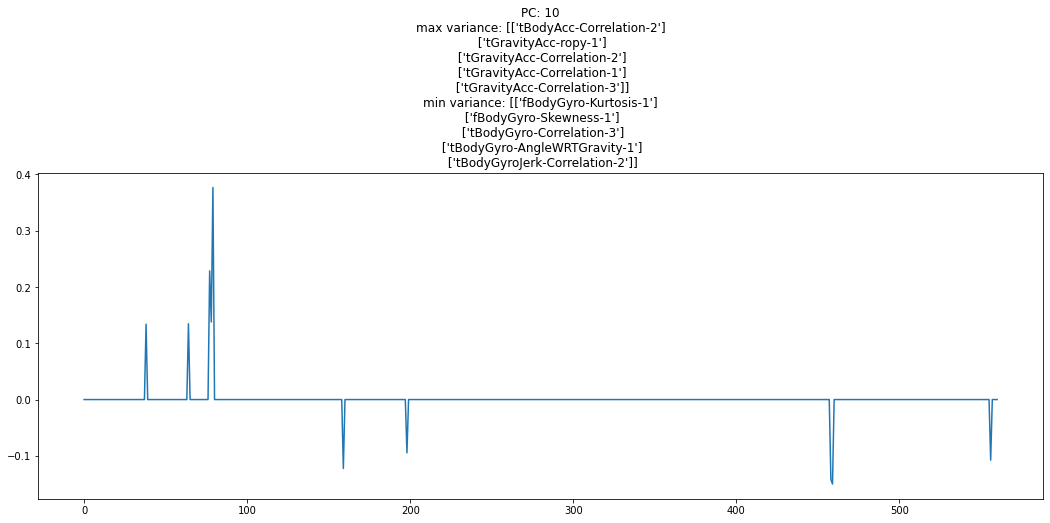

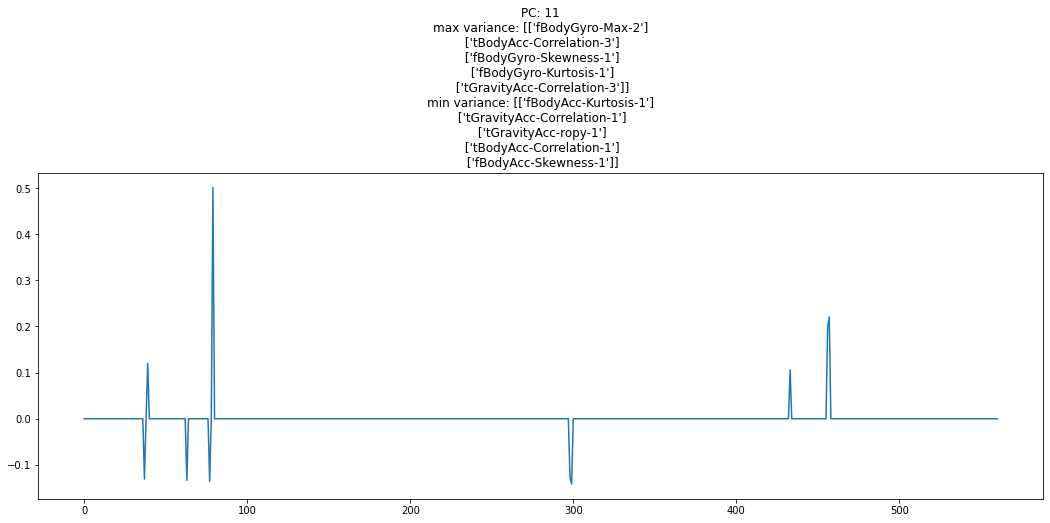

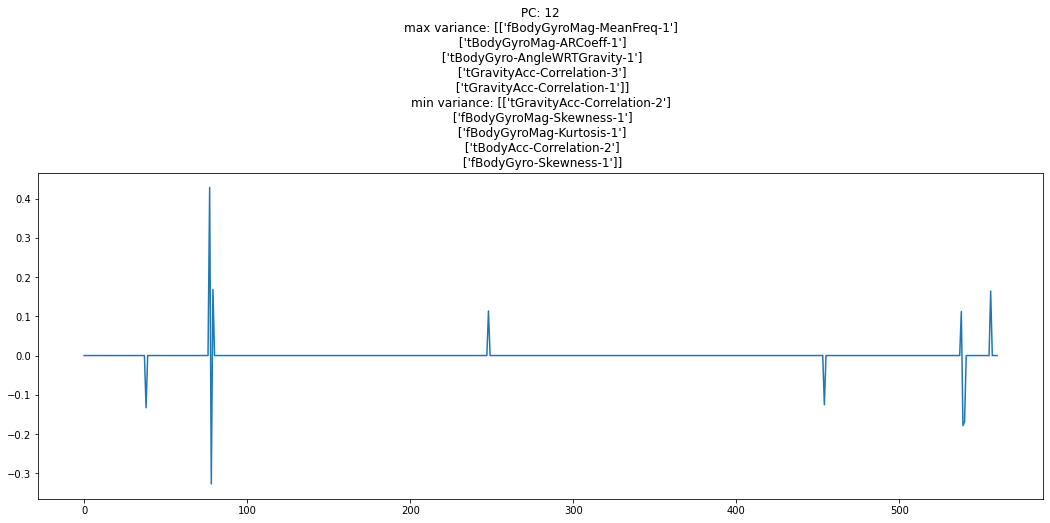

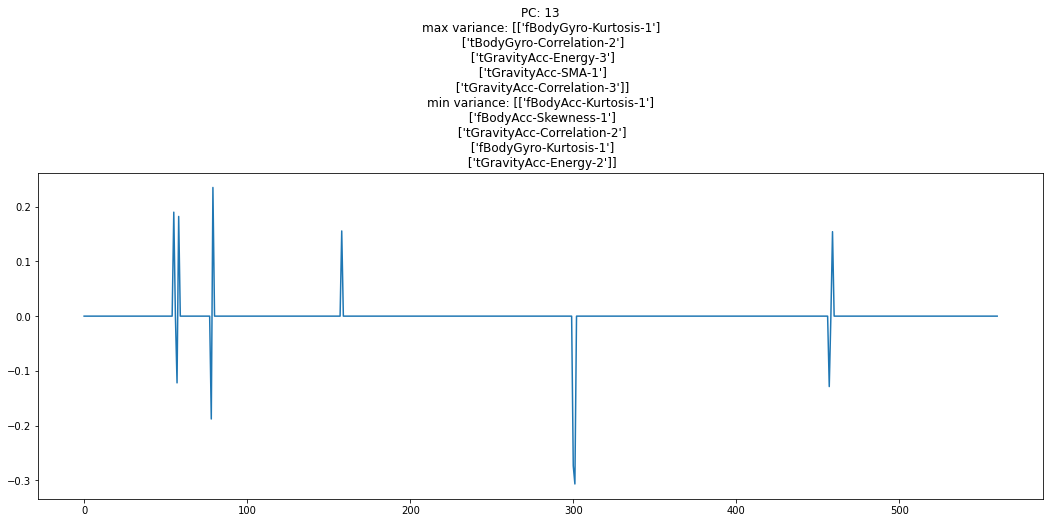

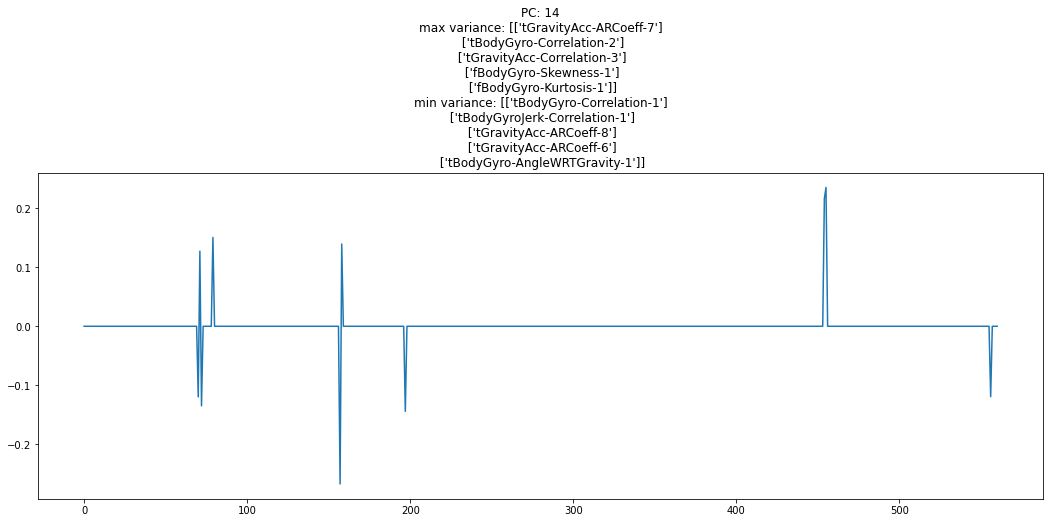

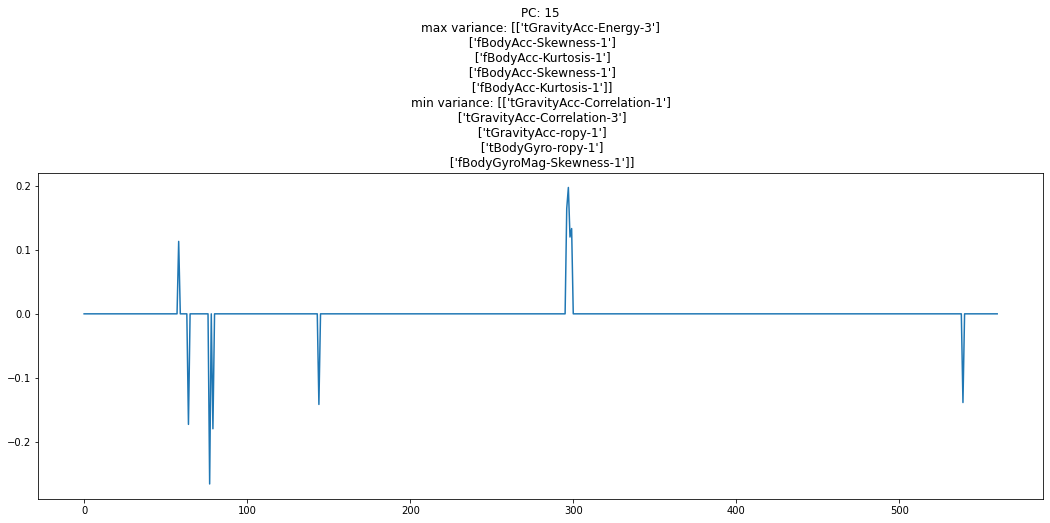

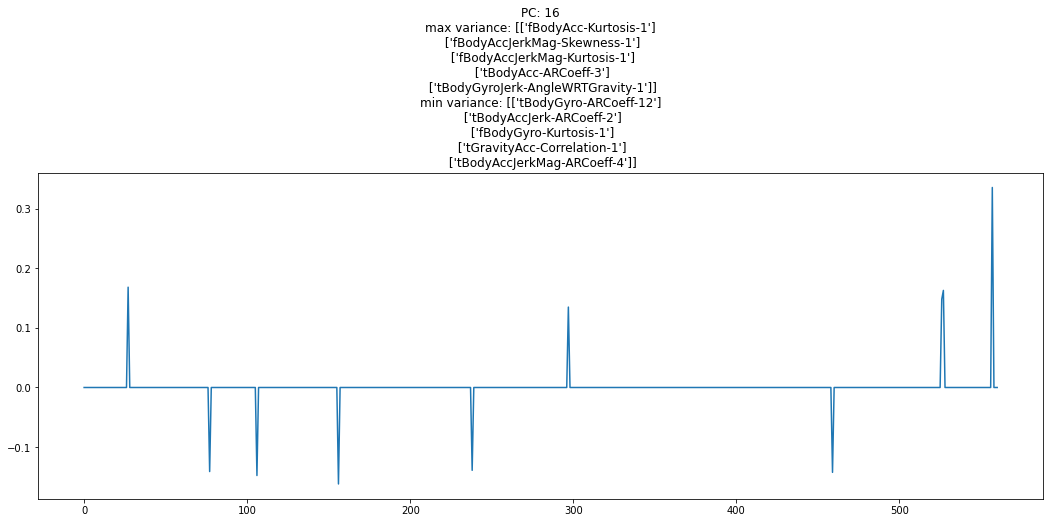

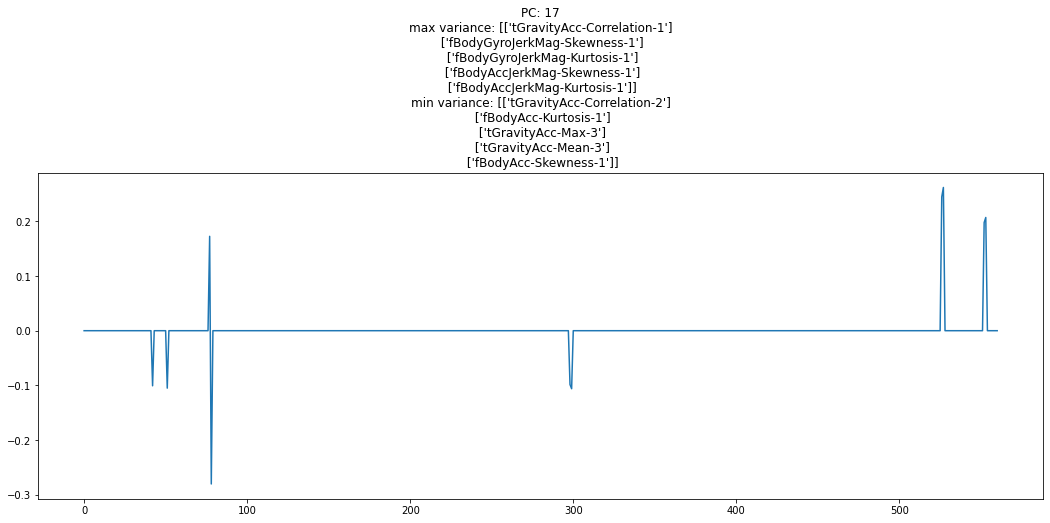

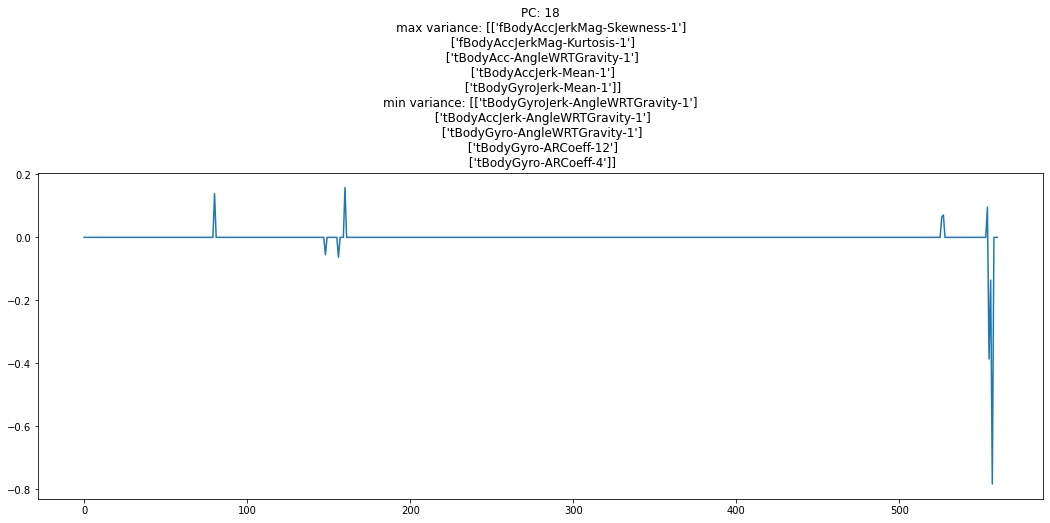

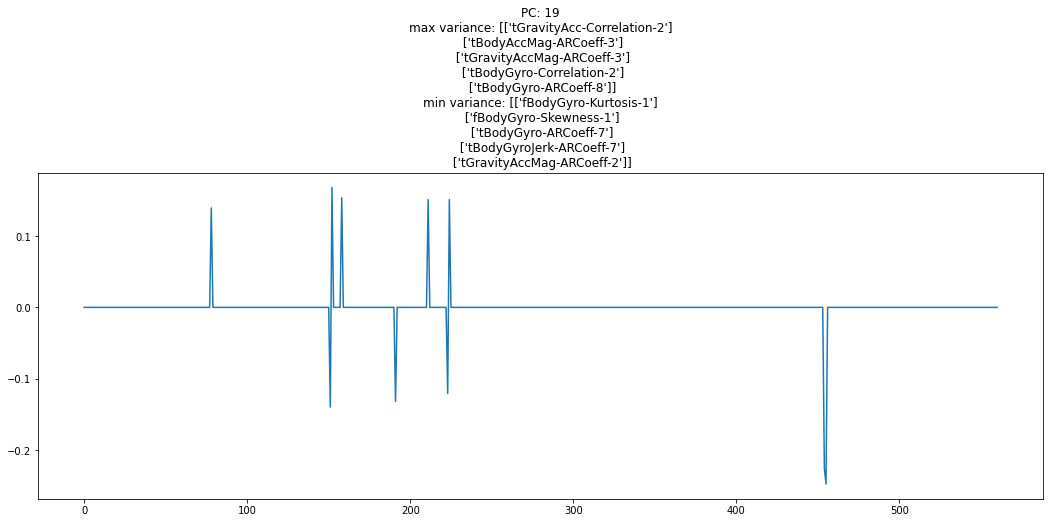

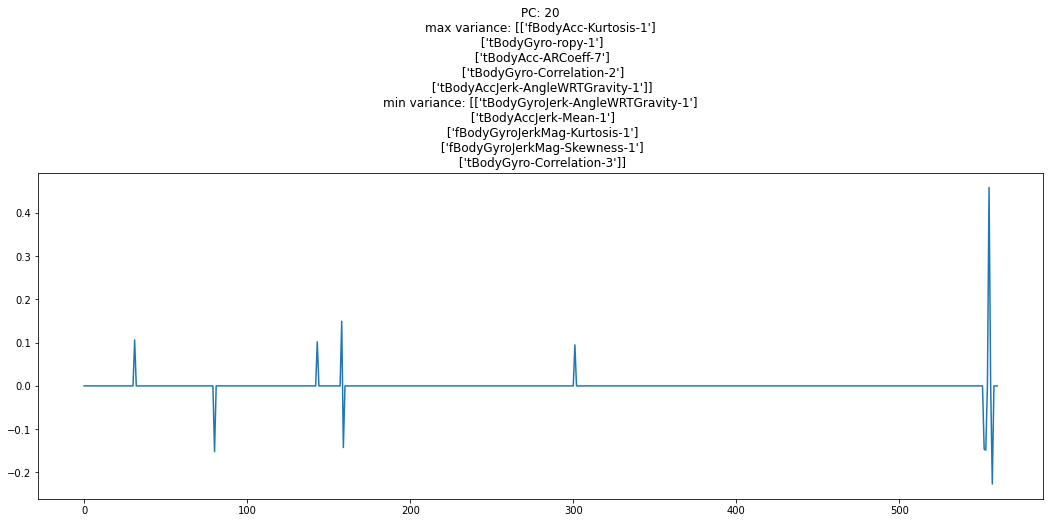

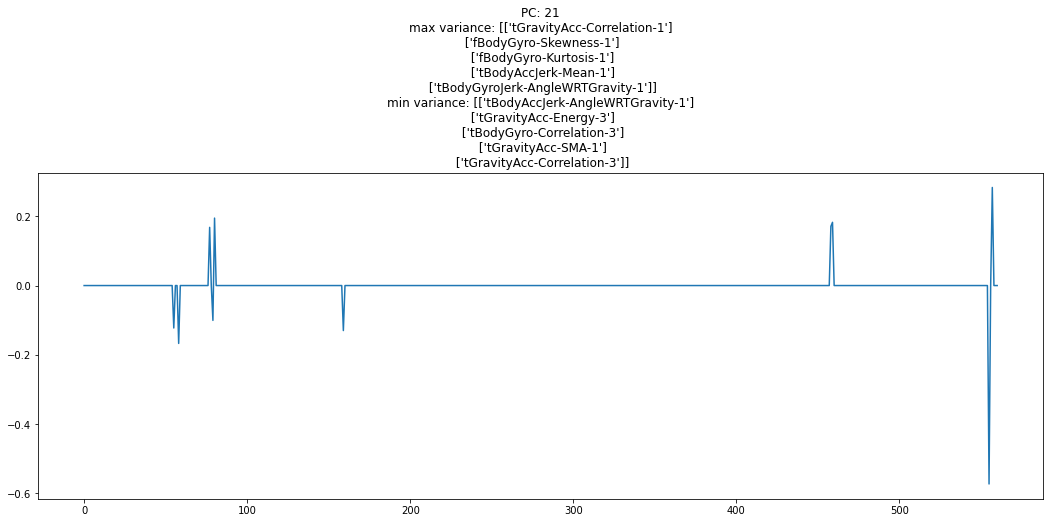

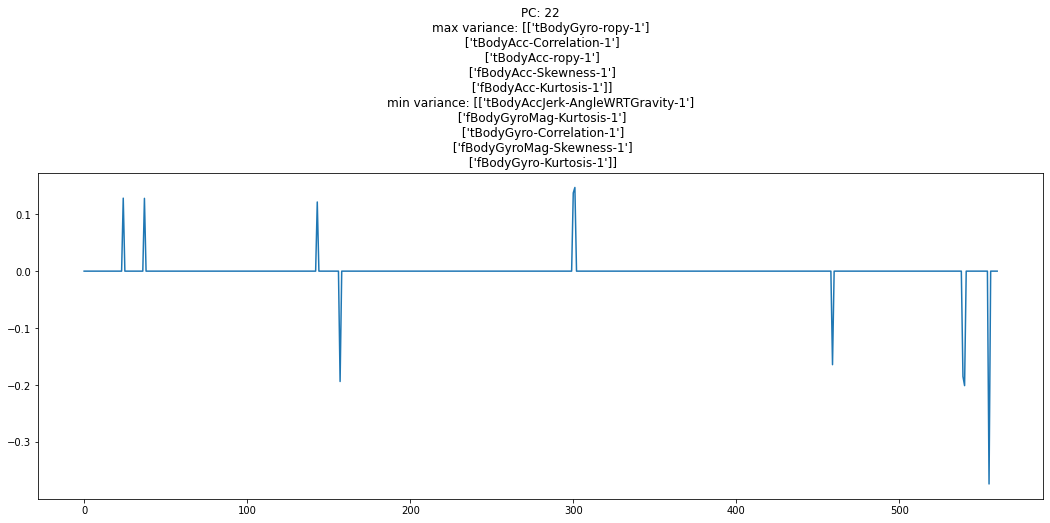

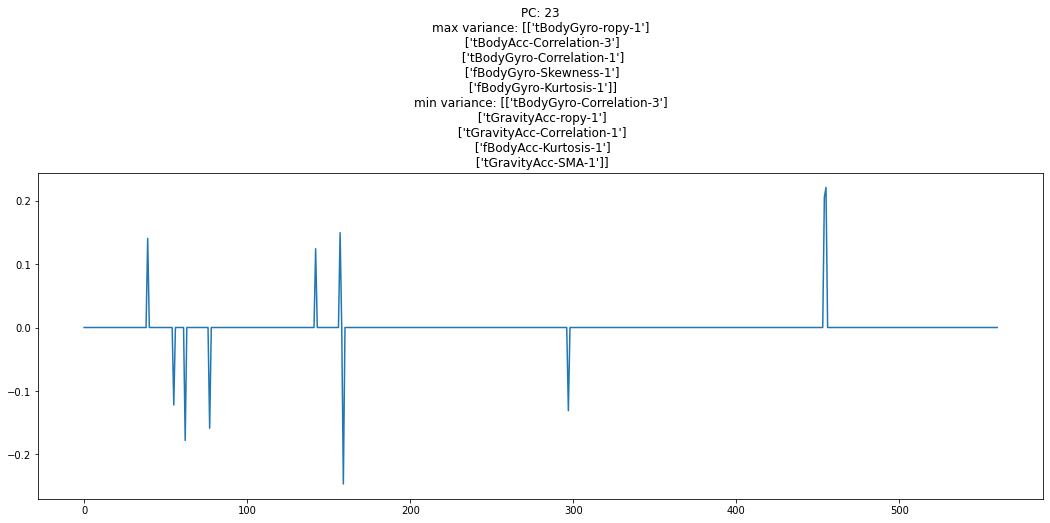

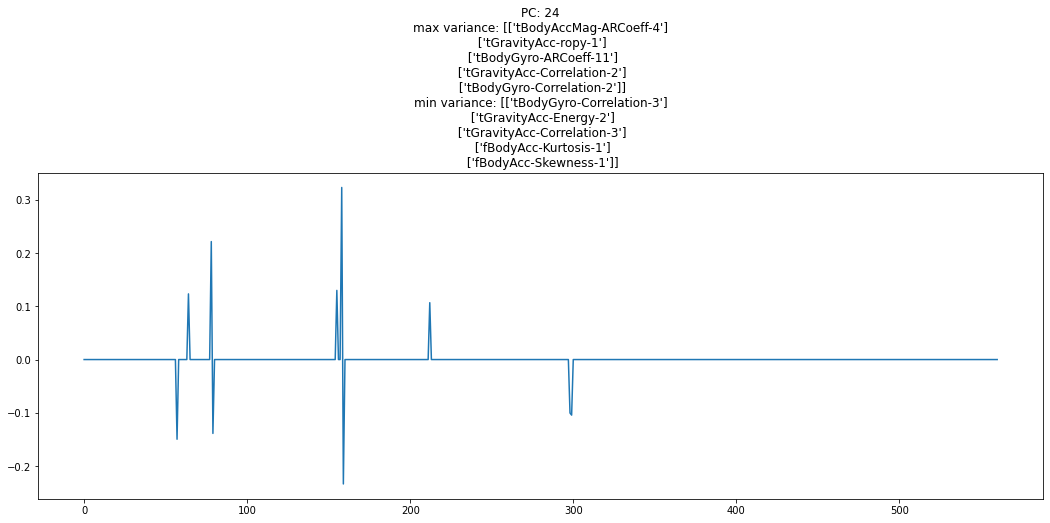

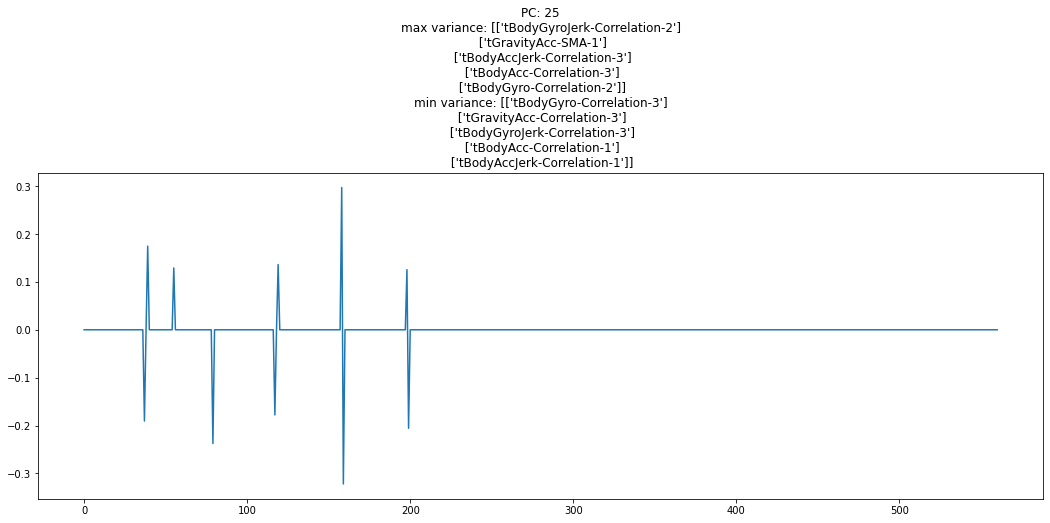

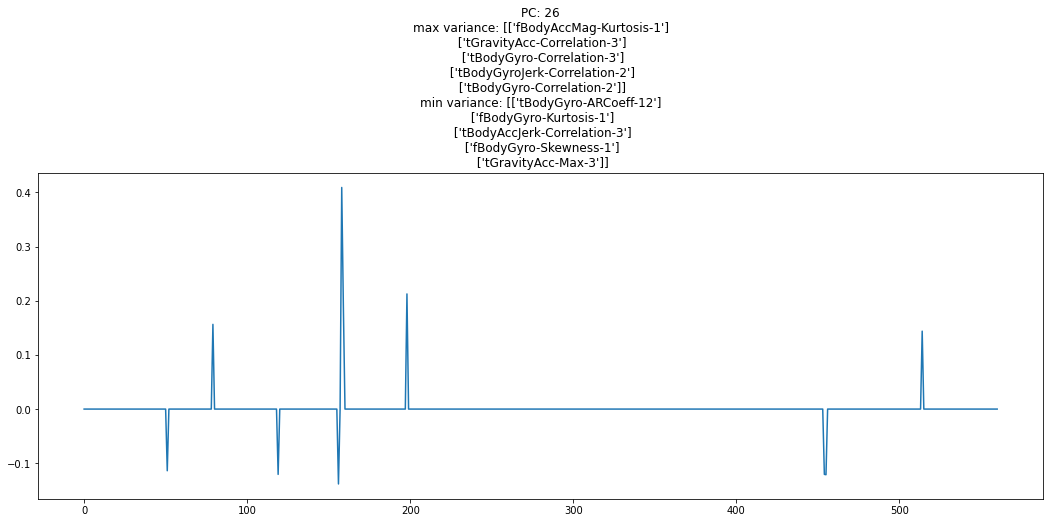

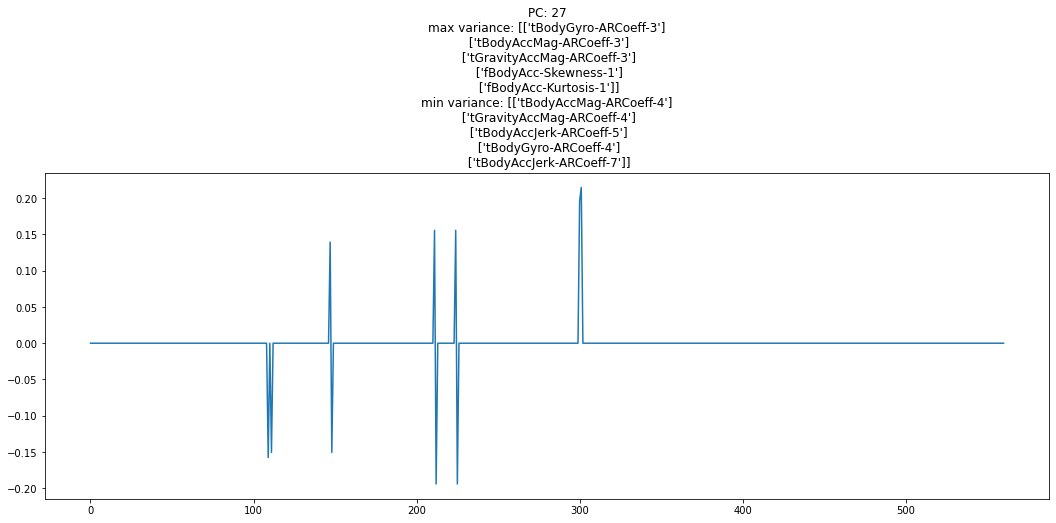

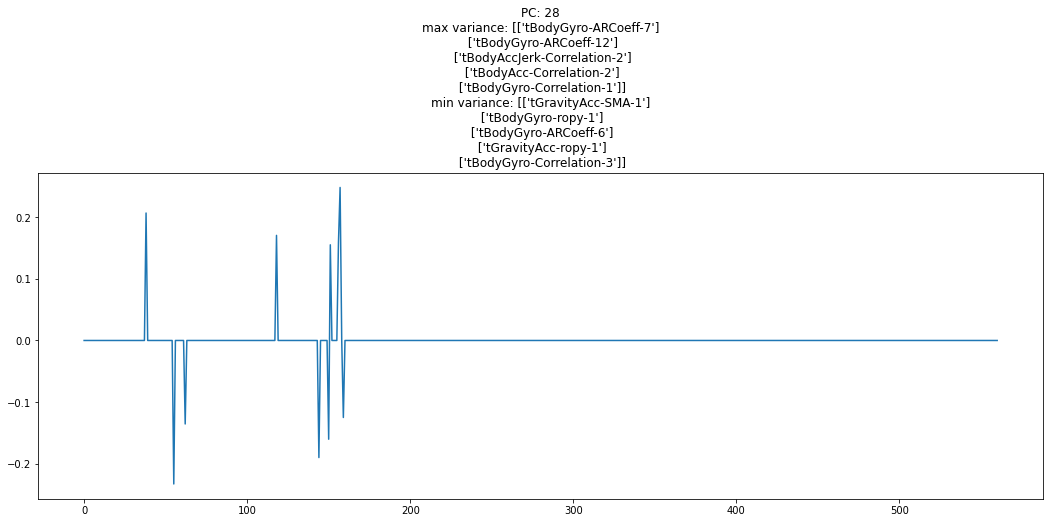

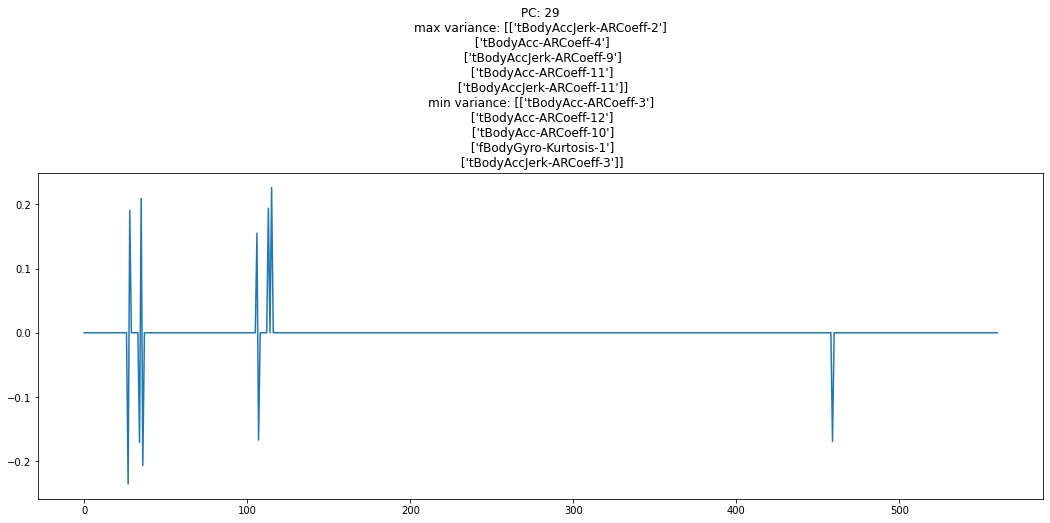

In [198]:
# show main direction of every compoment 
import heapq
pca_fea_nums = 30
qianduoshaoge = 10
new_V = V[:,:pca_fea_nums]

for i in range(pca_fea_nums):
    idx = new_V[:,i].argsort()
    max_five = idx[-5:]
    min_five = idx[:5]

    plt.figure(figsize=(18,6))
    new_data = np.array([0.0 for i in range(len(new_V[:,i]))])
    new_data[max_five] = new_V[:,i][max_five]

    new_data[min_five] = new_V[:,i][min_five]
    plt.title(str("PC: "+str(i)+"\n"+'max variance: '+str(attri_map[max_five])+"\n"+"min variance: "+str(attri_map[min_five])))
    plt.plot(new_data,'-')
